In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df3=pd.read_csv("incident_event_log.csv")

In [3]:
df3.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [4]:
df3[df3['number']=='INC0000045'][['sys_created_by','sys_updated_by','reopen_count','cmdb_ci','impact','urgency','priority','knowledge','u_priority_confirmation']]

,sys_created_by,sys_updated_by,reopen_count,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation
0,Created by 6,Updated by 21,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
1,Created by 6,Updated by 642,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
2,Created by 6,Updated by 804,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False
3,Created by 6,Updated by 908,0,?,2 - Medium,2 - Medium,3 - Moderate,True,False


In [5]:
df3.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

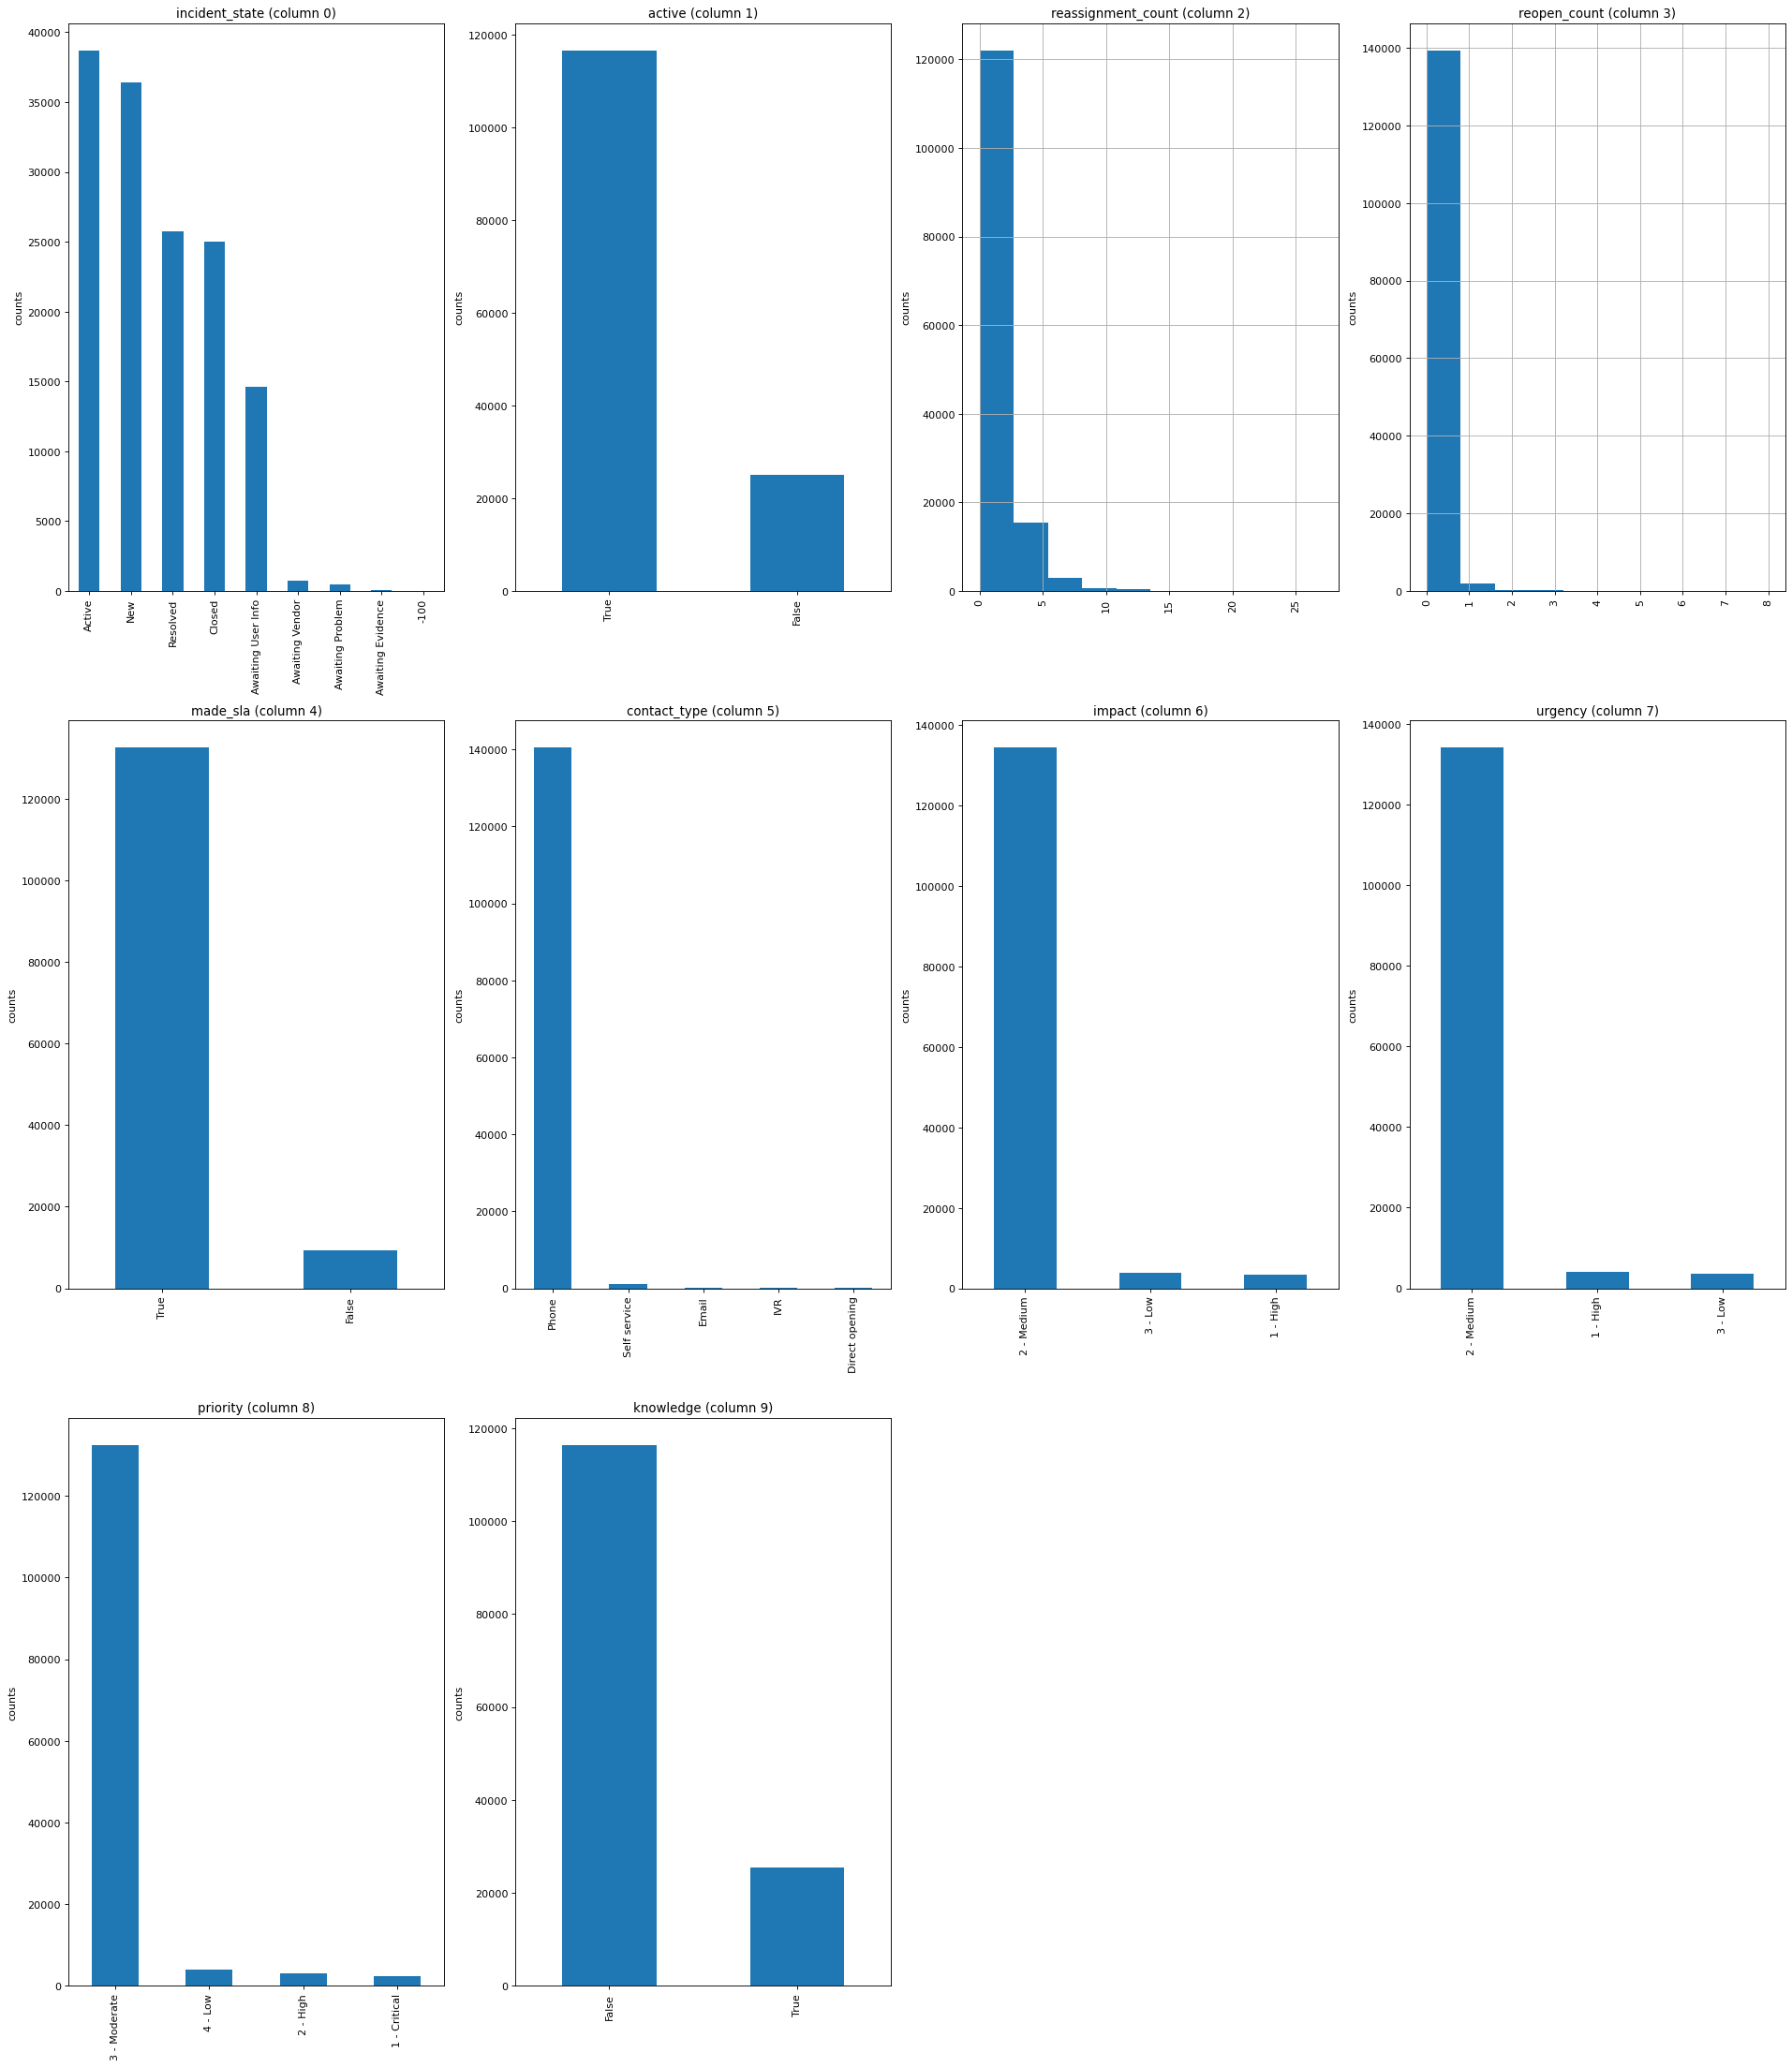

None


In [12]:
print(plotPerColumnDistribution(df3, 10, 4))

In [9]:
df3.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

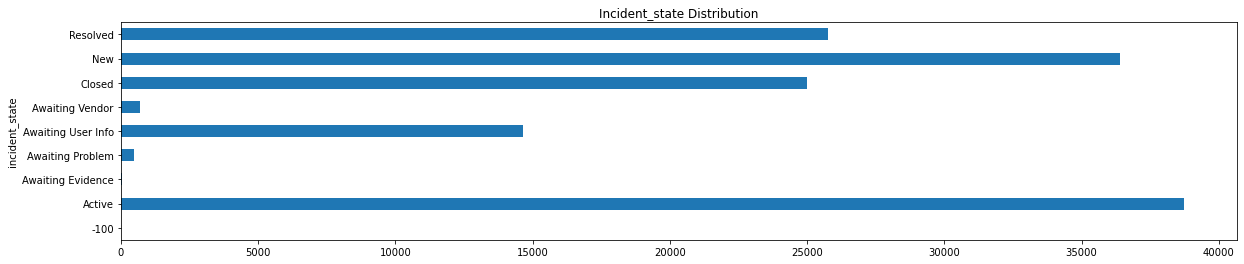

In [6]:
df3.groupby('incident_state').count()['number'] .plot(kind='barh',title='Incident_state Distribution',
          figsize=(20, 4))
plt.show()

In [7]:
df3['incident_state'].value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [10]:
df3.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


**Finding the incident closed code to check which type to tickets are raised more**

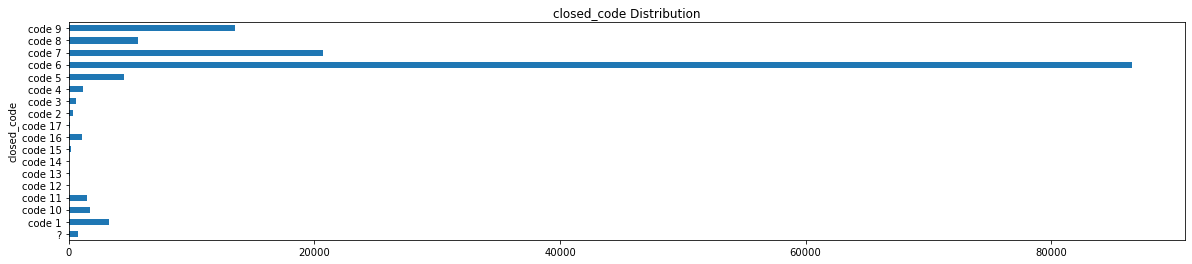

In [13]:
df3.groupby('closed_code').count()['number'] .plot(kind='barh',title='closed_code Distribution',
          figsize=(20, 4))
plt.show()

In [14]:
df3['closed_code'].value_counts()

code 6     86583
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [15]:
df_closed_inc = df3["incident_state"] == "Closed"
df_closed_inc = df3[df_closed_inc]

In [16]:
df_closed_inc.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

**As code numbers 6,7 are the major categories that are getting closed, we need to check if the reopened incidents are high in thoses codes or not**

In [17]:
#creating a temperory dataframe to store the reopened counts.
df_reopen = df_closed_inc["reopen_count"] > 0
df_reopen = df_closed_inc[df_reopen]

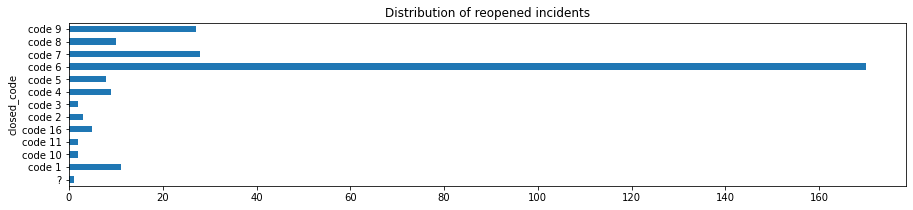

In [20]:
df_reopen.groupby('closed_code').count()['number'].plot(kind='barh',title='Distribution of reopened incidents',figsize=(15, 3))
plt.show()

In [19]:
df_reopen['closed_code'].value_counts()

code 6     170
code 7      28
code 9      27
code 1      11
code 8      10
code 4       9
code 5       8
code 16      5
code 2       3
code 10      2
code 11      2
code 3       2
?            1
Name: closed_code, dtype: int64

**Tickets generally contain an SLA which defines if the ticket is closed in the given timeframe. Now we need to find if the reopened tickets have any SLA missing. If SLA is false for the reopened incidents, then they are not finished on time.**

In [23]:
#Incidents that made the SLA in closed tickets
df_closed_inc['made_sla'].value_counts()

True     15831
False     9154
Name: made_sla, dtype: int64

In [21]:
#Incidents that made the SLA in reopened tickets
df_reopen['made_sla'].value_counts()

False    210
True      68
Name: made_sla, dtype: int64

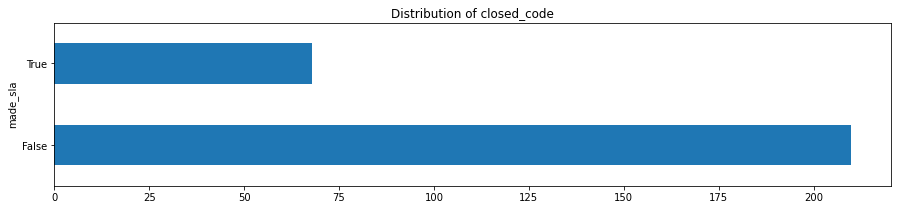

In [24]:
df_reopen.groupby('made_sla').count()['number'].plot(kind='barh',title='Distribution of closed_code',figsize=(15, 3))
plt.show()

In [26]:
pd.crosstab(df_closed_inc['made_sla'],df_closed_inc['priority'])

priority,1 - Critical,2 - High,3 - Moderate,4 - Low
made_sla,,,,
False,265,406,8358,125
True,6,2,15171,652


When checked the records for the incidents, It can be seen that SLAs are met for low proiorty incidents more in number when compared to the incidents with high/moderate priority.

**As we need to predict the incidents based on closed code, lets extract out some relevant features from the incident data**

In [27]:
df_rel_feat = df_closed_inc.loc[:,['reassignment_count','reopen_count','sys_mod_count','made_sla','location','category','subcategory','u_symptom','priority','vendor']]

In [30]:
#creating a temperory dataframe to store the categorical features
df_rel_feat_temp=pd.get_dummies(df_rel_feat)

In [31]:
df_rel_feat_temp.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,...,u_symptom_Symptom 96,u_symptom_Symptom 97,u_symptom_Symptom 99,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,vendor_?,vendor_Vendor 1,vendor_code 8s
3,0,0,4,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12,1,0,8,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19,0,0,6,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,0,0,3,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
31,1,0,7,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [33]:
df_rel_feat_temp['closed_code']=df_closed_inc['closed_code']

Splitting the data 

In [34]:
Y = df_rel_feat_temp['closed_code']
X = df_rel_feat_temp.drop(columns=['closed_code'])

In [35]:
X.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,location_?,location_Location 10,location_Location 100,location_Location 101,location_Location 102,location_Location 105,...,u_symptom_Symptom 96,u_symptom_Symptom 97,u_symptom_Symptom 99,priority_1 - Critical,priority_2 - High,priority_3 - Moderate,priority_4 - Low,vendor_?,vendor_Vendor 1,vendor_code 8s
3,0,0,4,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
12,1,0,8,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
19,0,0,6,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23,0,0,3,True,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
31,1,0,7,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


**Lets preidct the closed code to see which features have more importance.**

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=200,random_state=100)

In [37]:
model_1.fit(X,Y)

RandomForestClassifier(n_estimators=200, random_state=100)

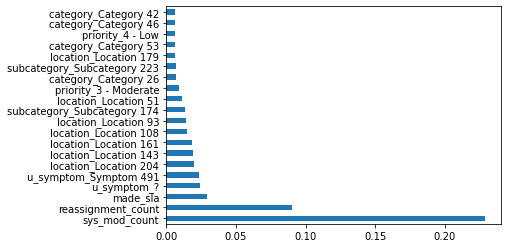

In [38]:
imp_feat=pd.Series(model_1.feature_importances_, index=X.columns)
imp_feat.nlargest(20).plot(kind='barh')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=5)

In [42]:
y_pred=model_1.predict(X_test)

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8808461978273299
